In [5]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:


pit_agrs_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pit60k_25/pit_60_merge_agrs.csv', header = 2)

pit_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']**2
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.120000,451.080000,0.000000,0.000000
1,76.0,0.059940,475.564460,0.000052,1196.583200
2,93.0,0.373920,354.133850,0.089079,44701.443838
3,108.0,0.530910,296.678422,0.088188,42922.983070
4,205.0,0.424303,337.505558,0.077865,40452.768434
...,...,...,...,...,...
2542,59944.0,0.665671,228.101875,0.048288,38020.891037
2543,59947.0,0.666343,227.786036,0.048193,37994.021906
2544,59958.0,0.667014,227.438670,0.048097,37977.598485
2545,59992.0,0.667683,227.105074,0.048002,37956.550178


In [7]:
pit_no_agrs_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pit60k_25/pit_60_merge_no_agrs.csv', header = 2)

pit_no_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_no_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']**2
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.040000,483.680000,0.000000e+00,0.000000
1,92.0,0.019980,491.848160,6.400000e-07,133.171200
2,500.0,0.041140,483.590619,3.023492e-06,270.467571
3,592.0,0.030824,487.705280,2.502803e-06,247.582922
4,595.0,0.024635,490.174069,1.893176e-06,215.824137
...,...,...,...,...,...
2198,59846.0,0.322203,384.100128,4.704290e-02,29016.451655
2199,59893.0,0.322562,383.938099,4.688043e-02,28970.720261
2200,59975.0,0.323933,383.392072,4.709259e-02,29059.363518
2201,59979.0,0.325300,382.944254,4.730317e-02,29099.626900


In [8]:
pit_agrs_no_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pit60k_25/pit_60_merge_agrs_no_t.csv', header = 2)

pit_agrs_no_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_no_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()



df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']**2
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs_no = df_av_at_step
df_agrs_no


,step,reward,length,reward_se,length_se
0,0.0,0.038462,484.653846,0.000000e+00,0.000000
1,101.0,0.019212,492.334596,5.470747e-07,117.752219
2,500.0,0.012795,494.894843,2.426581e-07,78.422952
3,601.0,0.009587,496.174963,1.362221e-07,58.758357
4,1000.0,0.015694,493.786445,2.135233e-07,72.407623
...,...,...,...,...,...
1795,59941.0,0.534432,306.693452,6.103291e-02,33925.900181
1796,59962.0,0.533334,307.090595,6.107176e-02,33932.890065
1797,59964.0,0.534293,306.636396,6.104173e-02,33963.494708
1798,59998.0,0.535250,306.470749,6.101086e-02,33907.065294


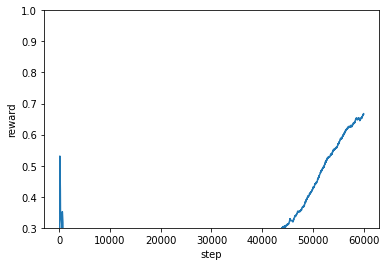

In [9]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

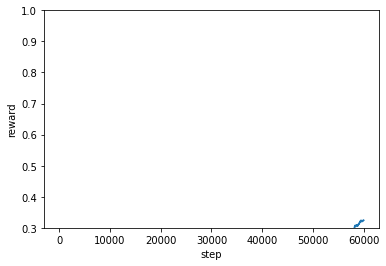

In [10]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

In [11]:

pal = sns.color_palette('deep')
pal.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

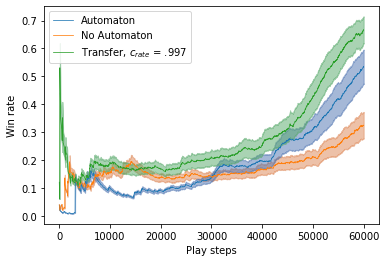

In [28]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Treasure Pit, 25x25 Fixed')

sns.lineplot(x="step", y="reward", data=df_agrs_no,ax=axs, ci=99, linewidth=0.75)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99, linewidth=0.75)
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99, linewidth=0.75)

axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5, color='#dd8452')
axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["reward"] + df_agrs_no["reward_se"], 
                 y2=df_agrs_no["reward"] - df_agrs_no["reward_se"], alpha=.5, color='#4c72b0')

axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5, color='#55a868')
axs.set(xlabel='Play steps', ylabel='Win rate')

axs.legend(['Automaton','No Automaton', 'Transfer, $c_{rate}$ = .997'], loc=2)

In [13]:
fig, axs = plt.subplots(ncols=1)
plt.title('Pqr transplant 25 * 60k steps at 80 expansions')
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_agrs_no,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)

axs.set(ylim=(180, 250))
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["length"] + df_no_agrs["length_se"], 
                 y2=df_no_agrs["length"] - df_no_agrs["length_se"], alpha=.5, color='#55a868')
#axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["length"] + df_agrs_no["length_se"], 
                 y2=df_agrs_no["length"] - df_agrs_no["length_se"], alpha=.5, color='#dd8452')

#axs.fill_between(x=df_agrs["step"], y1=df_agrs["length"] + df_agrs["length_se"], 
                 y2=df_agrs["length"] - df_agrs["length_se"], alpha=.5, color='#4c72b0')
axs.legend(['transplant','agrs', 'vanilla'], loc=4)

IndentationError: unexpected indent (<ipython-input-13-7e4189dfb747>, line 9)

In [ ]:
# pit agrs 100 30k plot
###########################


sns.tsplot(time='step', value='run/total_reward', data=pit_agrs_transplant_25_60k)

In [ ]:
pit_no_agrs_transplant_25_60k = pd.read_csv('cass_exp/pit_100_each/pit_no_agrs_transplant_25_60k_merge.csv', header = 2)

In [ ]:
pit_no_agrs_transplant_25_60k


In [ ]:
pit_no_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

In [ ]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
#sns.lineplot(x="step", y="run/total_reward",
 #            data = pit_agrs_transplant_25_60k)
fig, axs = plt.subplots(ncols=1)


sns.regplot(x='step', y='run/total_reward', data=pit_no_agrs_transplant_25_60k, marker=' ', color='blue', ci=.99, ax=axs)
sns.regplot(x='step', y='run/total_reward', data = pit_agrs_transplant_25_60k, marker = ' ', color='red', ci=.99, ax=axs)


In [ ]:
import numpy as np; np.random.seed(1)

x = pit_agrs_transplant_25_60k['step']
y=pit_agrs_transplant_25_60k['run/total_reward']
data = pd.DataFrame(y,x)
fig, (ax) = plt.subplots(ncols=1, sharey=True)

def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0) 



tsplot(ax, data)

ax.set_title("sns.tsplot")


plt.show()

In [ ]:
time_series_array = pit_agrs_transplant_25_60k['run/total_reward']
time_series_array

In [ ]:
data

In [ ]:
n_steps = 30

time_series_df = pd.DataFrame(time_series_array)
smooth_path = time_series_df.rolling(20).mean()
smooth_path.fillna(0)
path_deviation = time_series_df.rolling(20).std()
path_deviation.fillna(0)

left = (smooth_path-2*path_deviation).fillna(0)
right =  (smooth_path+2*path_deviation).fillna(0)
plt.plot(smooth_path, linewidth=2)
plt.fill_between(path_deviation.index, left, right, color='b', alpha=.1)

In [ ]:
right